<a href="https://colab.research.google.com/github/devanshishukla17/Assisgnment-1/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [245]:
print(X)


[[  1.     1.     1.     1.   455.13 108.  ]
 [  1.     1.     1.     2.    69.17  19.  ]
 [  1.     1.     1.     3.    72.88  13.  ]
 ...
 [  5.     7.     7.     7.     2.83   1.  ]
 [  5.     7.     7.     8.    13.06   0.  ]
 [  5.     7.     7.     9.   384.87  16.  ]]


In [244]:
dataset=pd.read_csv("SwedishMotorInsurance.csv")
dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [246]:
print(y)

[392491  46221  15694 ...    966      0 112252]


DATA PRE-PROCESSING


In [247]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [249]:
print(X_train)

[[3.00000e+00 7.00000e+00 4.00000e+00 3.00000e+00 9.60000e-01 0.00000e+00]
 [5.00000e+00 3.00000e+00 7.00000e+00 6.00000e+00 5.23390e+02 1.40000e+01]
 [1.00000e+00 7.00000e+00 3.00000e+00 4.00000e+00 4.61800e+01 1.00000e+00]
 ...
 [3.00000e+00 4.00000e+00 4.00000e+00 1.00000e+00 9.30380e+02 5.30000e+01]
 [1.00000e+00 4.00000e+00 6.00000e+00 2.00000e+00 2.98730e+02 5.00000e+00]
 [3.00000e+00 3.00000e+00 7.00000e+00 2.00000e+00 1.68152e+03 7.10000e+01]]


taking care of missing data

In [250]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer.fit(X[:, 0:8])
X[:, 0:8] = imputer.transform(X[:, 0:8])

In [251]:
print(X)

[[  1.           1.           1.           1.         455.13
  108.        ]
 [  1.           1.           1.           2.          69.17
   19.        ]
 [  1.           1.           1.           3.          72.88
   13.        ]
 ...
 [  5.           7.           7.           7.           2.83
    1.        ]
 [  5.           7.           7.           8.          13.06
   62.97774068]
 [  5.           7.           7.           9.         384.87
   16.        ]]


Encoding the independent variable (One hot encoding)

In [252]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[  1.           0.           0.         ...   1.         455.13
  108.        ]
 [  1.           0.           0.         ...   2.          69.17
   19.        ]
 [  1.           0.           0.         ...   3.          72.88
   13.        ]
 ...
 [  0.           0.           0.         ...   7.           2.83
    1.        ]
 [  0.           0.           0.         ...   8.          13.06
   62.97774068]
 [  0.           0.           0.         ...   9.         384.87
   16.        ]]


Encoding the dependent variable

In [253]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1515  881  559 ...   32    0 1208]


this does not work as it is not in classes.

Splitting the dataset into training set and testing dataset

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train)

[[0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 3.00000000e+00
  9.60000000e-01 6.29777407e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.00000000e+00
  5.23390000e+02 1.40000000e+01]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.00000000e+00
  4.61800000e+01 1.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  9.30380000e+02 5.30000000e+01]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.00000000e+00
  2.98730000e+02 5.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 2.00000000e+00
  1.68152000e+03 7.10000000e+01]]


In [255]:
print(X_test)

[[ 0.          0.          0.         ...  5.         25.1
   1.        ]
 [ 0.          0.          0.         ...  5.          0.7
  62.97774068]
 [ 0.          0.          0.         ...  2.          1.61
  62.97774068]
 ...
 [ 0.          0.          0.         ...  3.          0.2
  62.97774068]
 [ 1.          0.          0.         ...  3.         40.03
   1.        ]
 [ 0.          0.          0.         ...  2.         31.55
   3.        ]]


In [256]:
print(y_train)

[   0  992   17 ... 1454  567 1504]


In [257]:
print(y_test)

[ 710    0    0 1309 1424 1094  494    0  228  710    0   79    0  115
  432 1042 1338 1223  797 1405 1623    0  796  954  655  554  488    0
 1131    0 1058 1607  359 1537  598    0 1641    0 1373 1311  663  969
   45 1731  213  870  504  349 1694  795  848    0 1620 1478  974 1234
 1531 1238 1614   62  840 1290  960  299  247    0    0  509    0  418
  656  672    0 1575 1038    0    0    8 1697 1099 1728 1243    0  233
 1633 1551  116  249    0 1741  108 1712 1514  156  710 1713 1160  221
    0 1662  302  374  710  649 1588  315 1407    0 1316  212 1247 1519
    0 1632 1615 1403 1268    0 1499  924 1581   78 1120  389  387  842
 1379  640  327  739  146  669  238 1638    0 1218 1664 1267 1729 1430
  869 1721  749  662   49  456    0  706  320 1242 1179  900  905  618
 1027 1668  708  303    0 1117  613 1461  599  339 1376 1423  920  260
  294   39 1083 1284  487 1640 1216 1709 1396  251  961 1413 1372  268
  287 1596  927 1352  803 1628 1540  879  912    0  836    0  928    0
  451 

Feature Scaling(NORMALIZATION)

In [258]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-0.50536688 -0.49641572  1.96832459 ... -0.7554002  -0.17949419
   0.01648058]
 [-0.50536688 -0.49641572 -0.50804629 ...  0.40769393 -0.09200896
  -0.23245619]
 [ 1.97876046 -0.49641572 -0.50804629 ... -0.36770216 -0.17192173
  -0.29853065]
 ...
 [-0.50536688 -0.49641572  1.96832459 ... -1.53079629 -0.02385511
  -0.03423279]
 [ 1.97876046 -0.49641572 -0.50804629 ... -1.14309825 -0.12963014
  -0.27820005]
 [-0.50536688 -0.49641572  1.96832459 ... -1.14309825  0.1019295
   0.05725493]]


In [259]:
print(X_test)

[[-0.50536688 -0.49641572 -0.50804629 ...  0.01999589 -0.17545175
  -0.29853065]
 [-0.50536688 -0.49641572 -0.50804629 ...  0.01999589 -0.17953773
   0.01648058]
 [-0.50536688 -0.49641572 -0.50804629 ... -1.14309825 -0.17938535
   0.01648058]
 ...
 [-0.50536688 -0.49641572 -0.50804629 ... -0.7554002  -0.17962146
   0.01648058]
 [ 1.97876046 -0.49641572 -0.50804629 ... -0.7554002  -0.1729516
  -0.29853065]
 [-0.50536688 -0.49641572 -0.50804629 ... -1.14309825 -0.17437165
  -0.28836535]]


Data Visualization

In [260]:
import pandas as pd
data = pd.read_csv('SwedishMotorInsurance.csv')
print(data.head())

   Kilometres  Zone  Bonus  Make  Insured  Claims  Payment
0           1     1      1     1   455.13     108   392491
1           1     1      1     2    69.17      19    46221
2           1     1      1     3    72.88      13    15694
3           1     1      1     4  1292.39     124   422201
4           1     1      1     5   191.01      40   119373


In [261]:
print(data.describe())


        Kilometres         Zone        Bonus         Make        Insured  \
count  2182.000000  2182.000000  2182.000000  2182.000000    2182.000000   
mean      2.985793     3.970211     4.015124     4.991751    1092.195270   
std       1.410409     1.988858     2.000516     2.586943    5661.156245   
min       1.000000     1.000000     1.000000     1.000000       0.010000   
25%       2.000000     2.000000     2.000000     3.000000      21.610000   
50%       3.000000     4.000000     4.000000     5.000000      81.525000   
75%       4.000000     6.000000     6.000000     7.000000     389.782500   
max       5.000000     7.000000     7.000000     9.000000  127687.270000   

            Claims       Payment  
count  2182.000000  2.182000e+03  
mean     51.865720  2.570076e+05  
std     201.710694  1.017283e+06  
min       0.000000  0.000000e+00  
25%       1.000000  2.988750e+03  
50%       5.000000  2.740350e+04  
75%      21.000000  1.119538e+05  
max    3338.000000  1.824503e+07  


<Axes: >

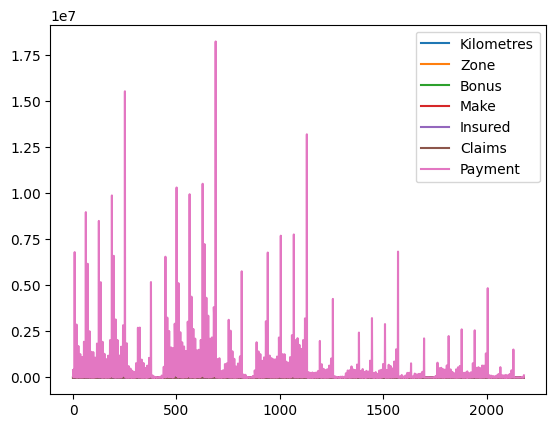

In [262]:
data.plot()

Kilometres       Axes(0.125,0.11;0.0945122x0.77)
Zone          Axes(0.238415,0.11;0.0945122x0.77)
Bonus         Axes(0.351829,0.11;0.0945122x0.77)
Make          Axes(0.465244,0.11;0.0945122x0.77)
Insured       Axes(0.578659,0.11;0.0945122x0.77)
Claims        Axes(0.692073,0.11;0.0945122x0.77)
Payment       Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

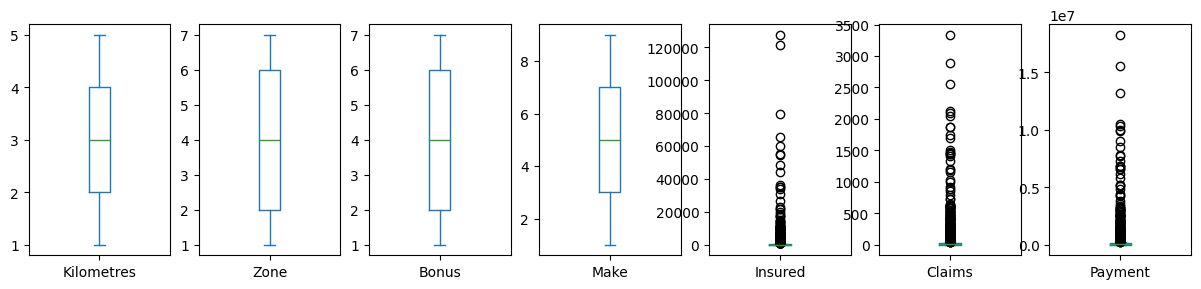

In [263]:
data.plot(kind='box', subplots=True, figsize=(15,3))


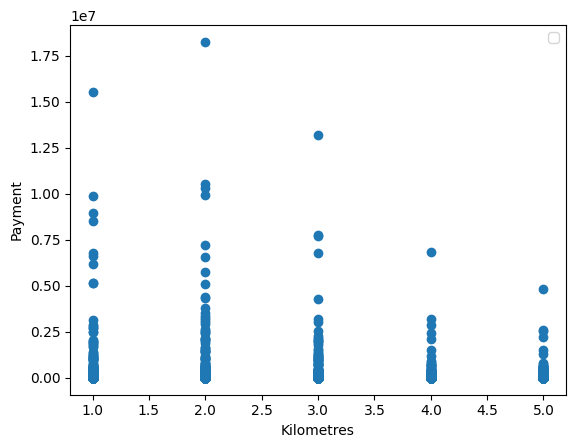

In [264]:
import matplotlib.pyplot as plt
plt.scatter(data['Kilometres'],data['Payment'])
plt.xlabel('Kilometres')
plt.ylabel('Payment')
plt.legend()
plt.show()

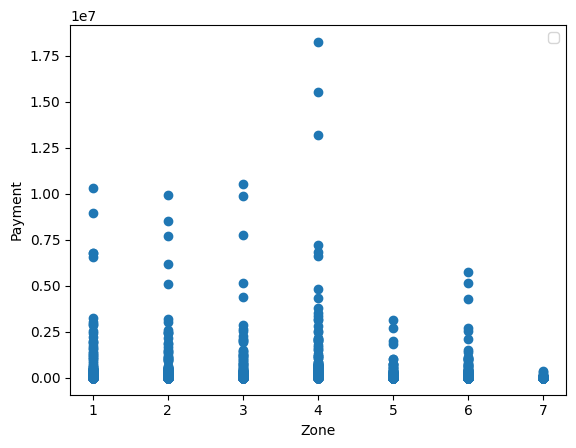

In [265]:
import matplotlib.pyplot as plt
plt.scatter(data['Zone'],data['Payment'])
plt.xlabel('Zone')
plt.ylabel('Payment')
plt.legend()
plt.show()

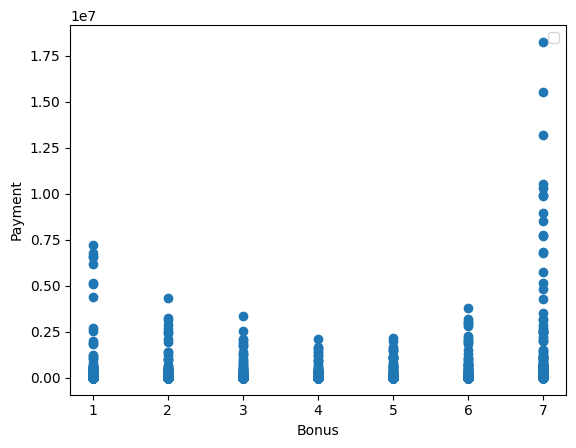

In [266]:
import matplotlib.pyplot as plt
plt.scatter(data['Bonus'],data['Payment'])
plt.xlabel('Bonus')
plt.ylabel('Payment')
plt.legend()
plt.show()

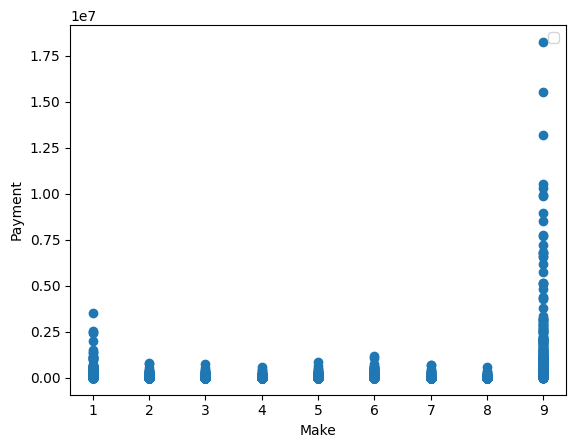

In [267]:
import matplotlib.pyplot as plt
plt.scatter(data['Make'],data['Payment'])
plt.xlabel('Make')
plt.ylabel('Payment')
plt.legend()
plt.show()

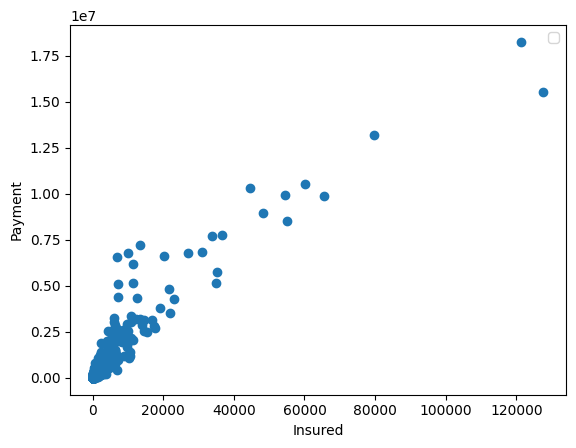

In [268]:
import matplotlib.pyplot as plt
plt.scatter(data['Insured'],data['Payment'])
plt.xlabel('Insured')
plt.ylabel('Payment')
plt.legend()
plt.show()

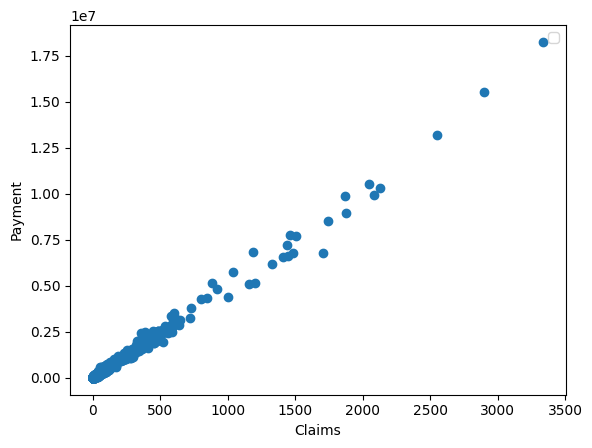

In [269]:
import matplotlib.pyplot as plt
plt.scatter(data['Claims'],data['Payment'])
plt.xlabel('Claims')
plt.ylabel('Payment')
plt.legend()
plt.show()

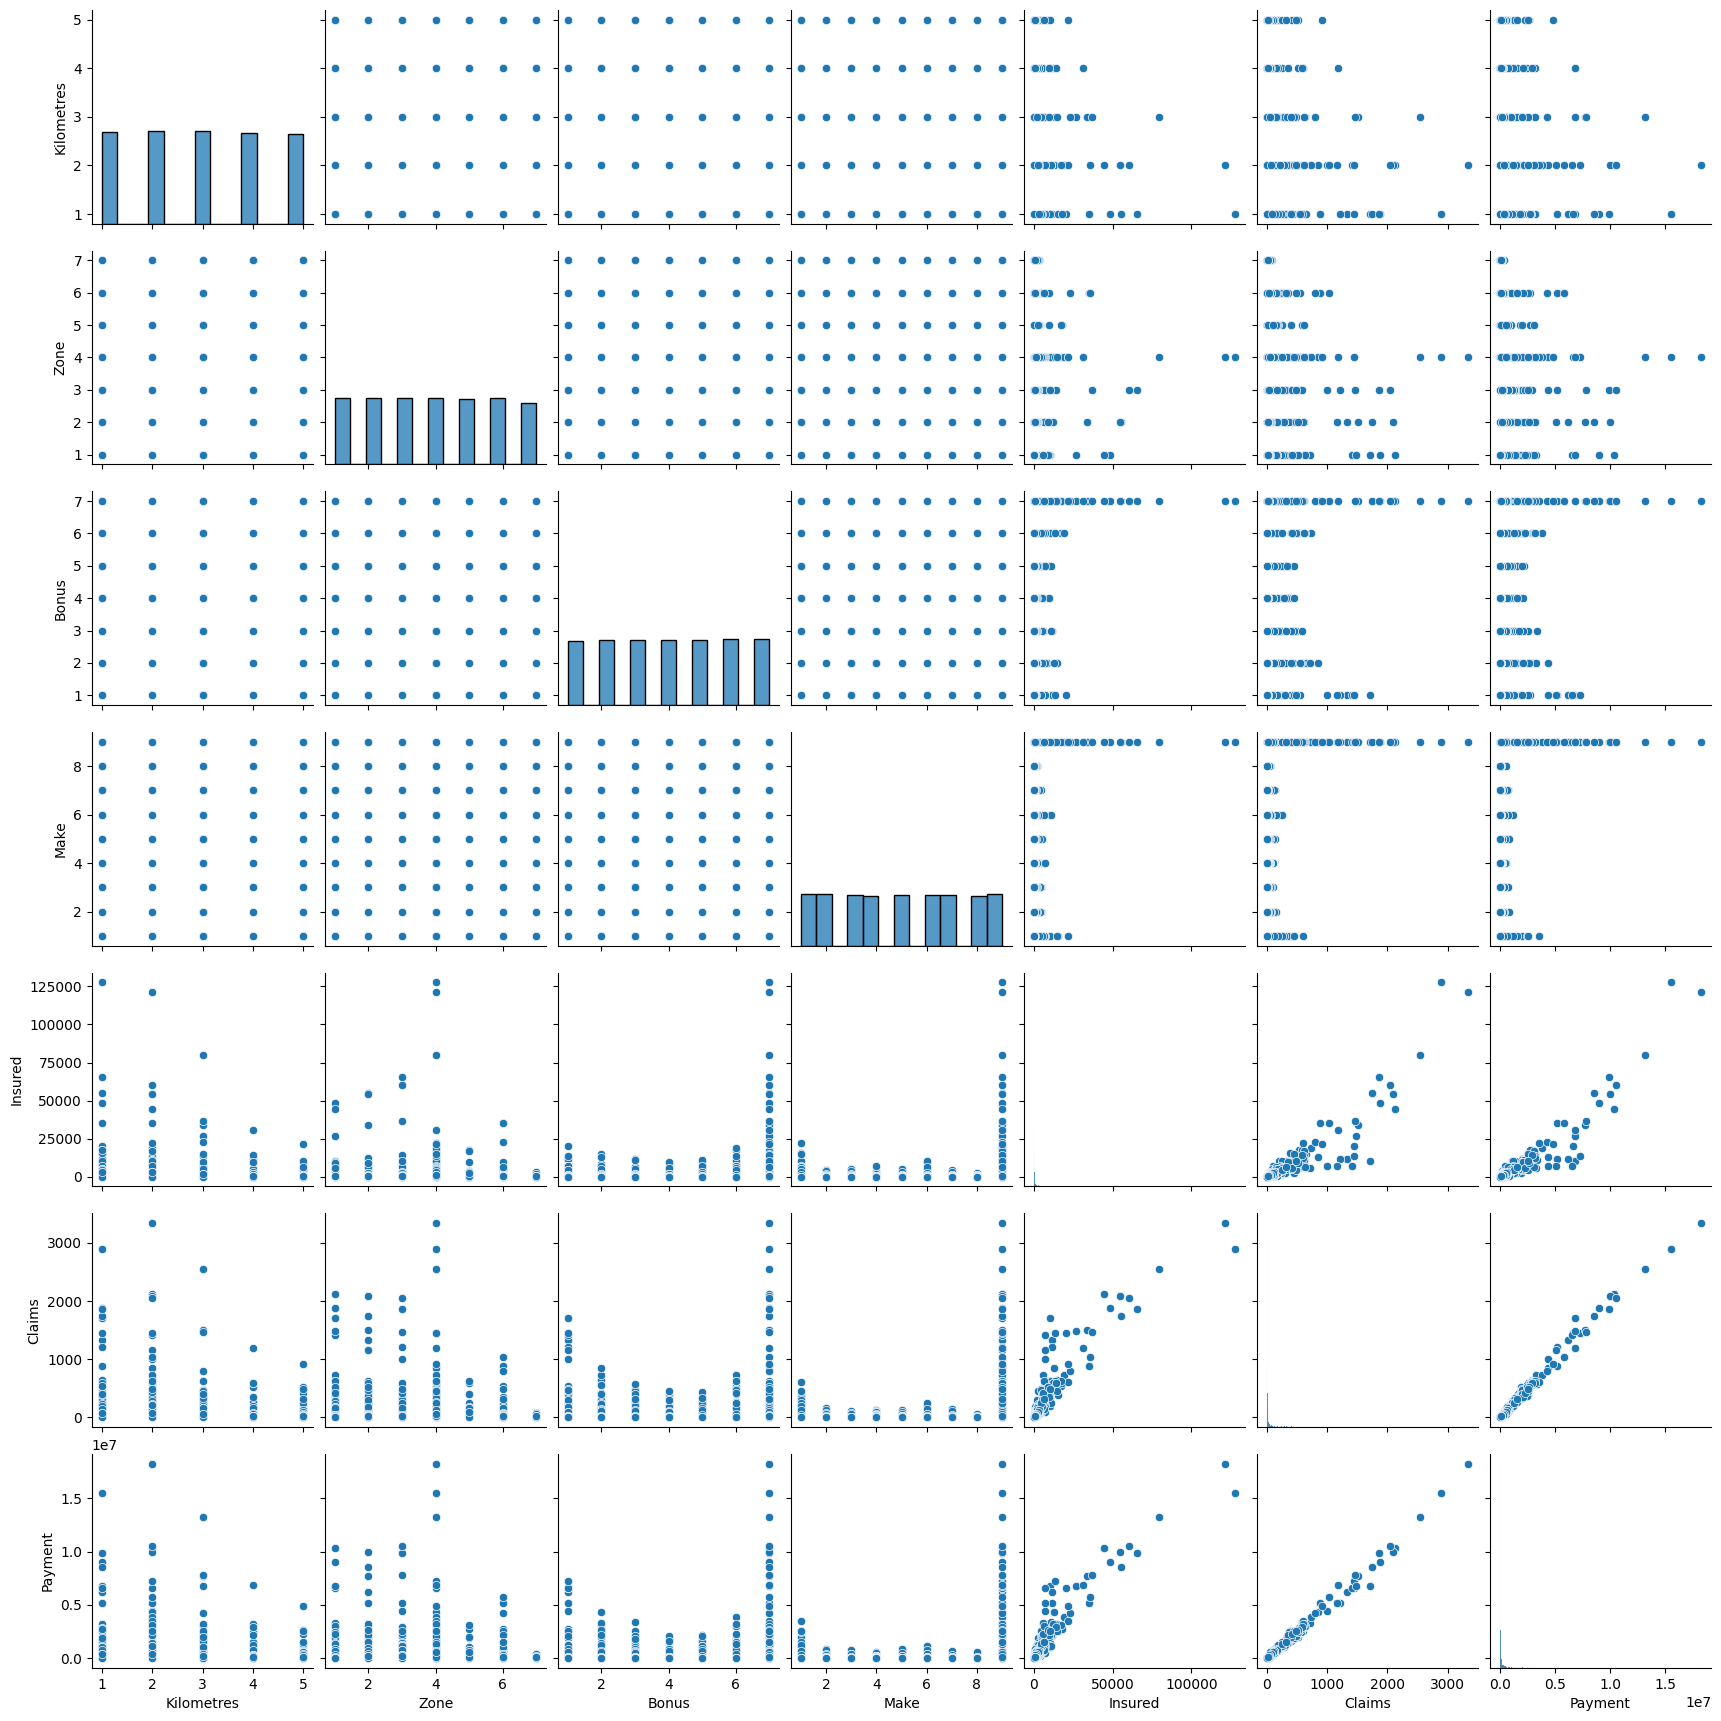

In [270]:
import seaborn as sns
sns.pairplot(data)

<Axes: >

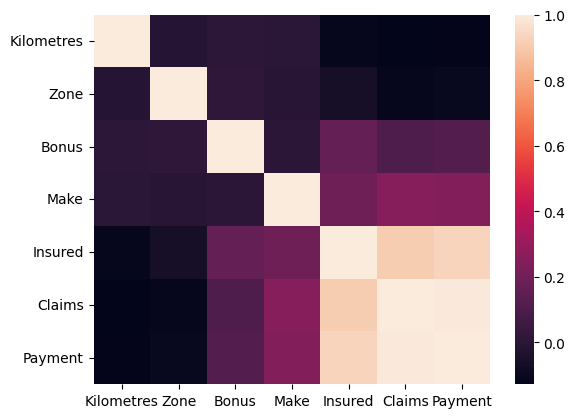

In [272]:
import seaborn as sns
sns.heatmap(data.corr())

...........................................................................................................................................................................

REGRESSION

SIMPLE LINEAR REGRESSION

In [273]:
dataset = pd.read_csv('SwedishMotorInsurance.csv')
dataset
X = dataset.iloc[:, 4:5].values
y = dataset.iloc[:, -1].values

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [275]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

predicting test set results

In [276]:
y_pred = regressor.predict(X_test)


visualizing training set results


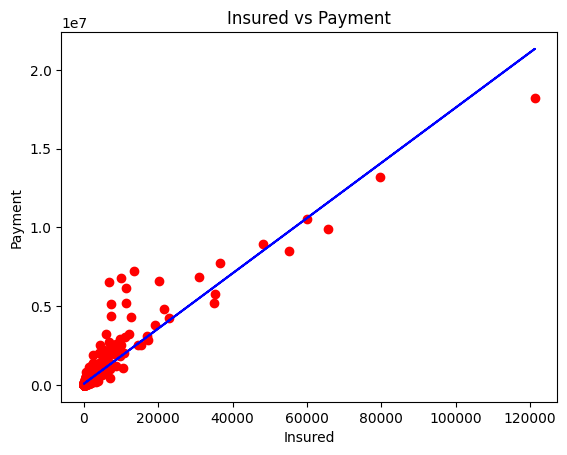

In [277]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Insured vs Payment')
plt.xlabel('Insured')
plt.ylabel('Payment')
plt.show()

In [279]:
regressor.score(X_test,y_test)

0.8702175294652681

In [280]:
dataset = pd.read_csv('SwedishMotorInsurance.csv')
dataset
X = dataset.iloc[:, 5:6].values
y = dataset.iloc[:, -1].values

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [282]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [283]:
y_pred = regressor.predict(X_test)

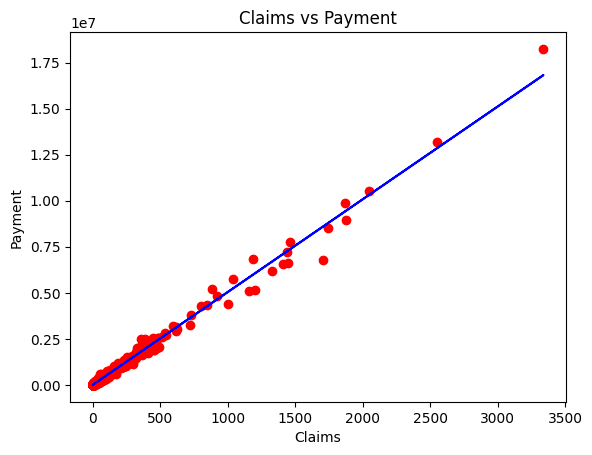

In [284]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Claims vs Payment')
plt.xlabel('Claims')
plt.ylabel('Payment')
plt.show()

In [287]:
regressor.score(X_test,y_test)

0.9925470576319243

visualizing test set results

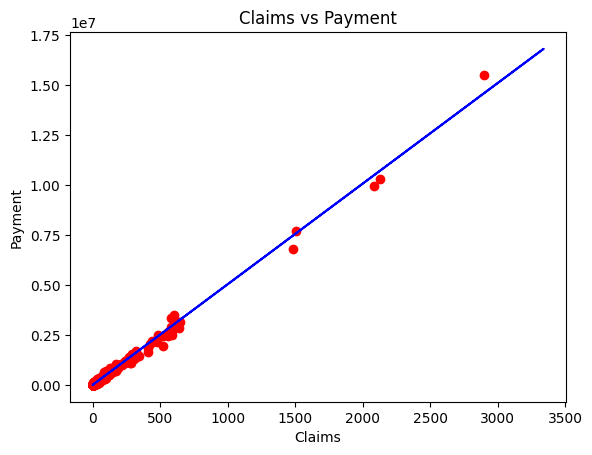

In [285]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Claims vs Payment')
plt.xlabel('Claims')
plt.ylabel('Payment')
plt.show()

In [286]:
regressor.score(X_test,y_test)

0.9925470576319243

LOGISTIC REGRESSION

In [288]:
dataset = pd.read_csv('SwedishMotorInsurance.csv')
X = dataset.iloc[:, 5:6].values
y = dataset.iloc[:, -1].values

In [289]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [290]:
print(X_train)

[[45]
 [ 2]
 [ 7]
 ...
 [51]
 [ 1]
 [34]]


In [291]:
print(y_train)

[142660   8498  20675 ... 272422   2200 209378]


In [292]:
print(X_test)

[[   0]
 [  19]
 [  12]
 [2087]
 [ 115]
 [  14]
 [   0]
 [   9]
 [  81]
 [ 584]
 [  14]
 [   0]
 [   3]
 [   1]
 [   4]
 [  22]
 [   4]
 [   2]
 [   3]
 [ 122]
 [   0]
 [  16]
 [  12]
 [  70]
 [   5]
 [   3]
 [  12]
 [  22]
 [  19]
 [   6]
 [   5]
 [   6]
 [   3]
 [   0]
 [ 645]
 [   1]
 [   2]
 [  27]
 [   6]
 [ 107]
 [   1]
 [   6]
 [   6]
 [   1]
 [   7]
 [  13]
 [   0]
 [  38]
 [   6]
 [   9]
 [ 125]
 [  52]
 [  78]
 [   0]
 [   2]
 [   3]
 [  11]
 [ 176]
 [   2]
 [   1]
 [  22]
 [ 242]
 [  23]
 [ 159]
 [   3]
 [   1]
 [  26]
 [  45]
 [   8]
 [  14]
 [  22]
 [   0]
 [  53]
 [   0]
 [   2]
 [   0]
 [  23]
 [   1]
 [  72]
 [  49]
 [  11]
 [  15]
 [   3]
 [  38]
 [   0]
 [  13]
 [  16]
 [  11]
 [   5]
 [ 282]
 [   0]
 [   6]
 [  14]
 [  87]
 [   0]
 [   1]
 [   4]
 [  21]
 [  87]
 [  12]
 [   9]
 [ 101]
 [   4]
 [  10]
 [   2]
 [  25]
 [   0]
 [  19]
 [   0]
 [  13]
 [  10]
 [   4]
 [  91]
 [   2]
 [ 154]
 [   9]
 [   0]
 [   3]
 [  13]
 [   2]
 [   0]
 [  13]
 [  12]
 [  10]
 [   6]


In [294]:
print(y_test)

[       0   111059    41206  9950131   676893    74804        0    15099
   449815  2899470    64812        0     5949     6939    37247   161455
     7244     6906    33925   505940        0    49061    86801   360223
     2059    12589    61341    76756    41459    50067    47591    10543
    14203        0  3150912     1878     4738    92572    47495   520377
    31442    70624    49844     4581     8258    37643        0   182641
    13026    19434   470051   296108   450864        0     2629    36029
   119909  1044585     3952     8390    91135  1174270    39598   771665
    10519     4656   157981   110181    11642    41905   112479        0
   234736        0     8741        0   142536      956   342421   319803
    34844    57916    11762   108198        0    55103    59634    99429
    40319  1079230        0    80041    90310   438695        0    31442
    15546    52327   641508    23087    52060   489424    15205    15713
     3887    90162        0   141774        0    75

training the logistic regression model on training set

In [295]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

predicting test set results

In [296]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[       0        0]
 [13203616   111059]
 [ 8500391    41206]
 ...
 [       0        0]
 [       0    31442]
 [       0     2193]]


In [297]:
classifier.score(X_test, y_test)

0.16117216117216118

KNN

In [298]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [299]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[     0      0]
 [ 42561 111059]
 [ 33767  41206]
 ...
 [     0      0]
 [  1512  31442]
 [ 31442   2193]]


In [300]:
classifier.score(X_test, y_test)

0.17399267399267399

SVM

In [301]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[     0      0]
 [ 42561 111059]
 [ 33767  41206]
 ...
 [     0      0]
 [  1512  31442]
 [ 31442   2193]]


In [302]:
classifier.score(X_test, y_test)

0.17399267399267399

DECISION TREES

In [303]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [304]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[     0      0]
 [ 42561 111059]
 [ 29123  41206]
 ...
 [     0      0]
 [  1065  31442]
 [ 31442   2193]]


In [305]:
classifier.score(X_test, y_test)

0.17399267399267399